In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('STRETCH BOIL-OFF 100% COTTON_single weft_single warp_1.csv')

In [3]:
df.head()

,WARP count (Ne) (Blend:100% Cotton),WEFT count (Ne) (Blend:Cotton/SPDX),Spandex(Denier) in Weft core,Greige Ends / Inch,Greige Picks/Inch,WEAVE,Greige Width,BOIL-OFF Width
0,10,10,105,62,54,3/1 Z TWILL,194.0,147.0
1,10,10,70,66,40,OXFORD,170.0,141.5
2,10,10,70,66,44,3/1 S TWILL,193.5,138.0
3,10,10,70,66,44,3/1 S TWILL,193.0,144.0
4,10,10,70,66,50,2/1 HBT,174.5,139.5


In [4]:
df.shape

(1255, 8)

In [5]:
## getting all weave designs in our data
print(df['WEAVE'].unique())

['3/1 Z TWILL' 'OXFORD' '3/1 S TWILL' '2/1 HBT' '2/2 S TWILL'
 '2/1 S TWILL' '2/2 MATT' '2/2 BKT' '3/1 BKT' '3/1 HBT' '2/2 HBT' 'PLAIN'
 '4/1 S SATIN' '2/2 Z TWILL' '3/2 S TWILL' '4/1 S TWILL' '2/1 Z TWILL'
 '4/1 Z TWILL' '3/3 S TWILL' 'ROYAL OXFORD' '3/2 MATT' '1/4 S SATIN']


In [6]:
##Adding weave factors of similar M1 and M2
WEAVE = {'3/1 Z TWILL': 1.6, 'OXFORD' : 2, '3/1 S TWILL': 1.6, '2/1 HBT': 1.46, 
        '2/2 S TWILL': 1.6, '2/1 S TWILL': 1.38, '2/2 MATT': 2, '2/2 BKT': 1.33,
        '3/1 BKT': 1.6, '3/1 HBT': 1.91, '2/2 HBT': 1.809, 'PLAIN': 1, '4/1 S SATIN': 1.92,
        '2/2 Z TWILL': 1.6, '3/2 S TWILL': 1.92, '4/1 S TWILL': 1.92, '2/1 Z TWILL': 1.38,
        '4/1 Z TWILL': 1.92, '3/3 S TWILL': 2.25, 'ROYAL OXFORD': 1.71, '3/2 MATT': 3, '1/4 S SATIN': 1.92}
df.WEAVE = [WEAVE[item] for item in df.WEAVE]

In [7]:
df['M1'] = df['WEAVE']
df['M2'] = df['WEAVE']

In [8]:
M2 = {1.6 : 1.6, 2 : 1, 1.6 : 1.6, 1.46 : 1.28, 
        1.6 : 1.6, 1.38 : 1.28, 2 : 2, 1.33 : 1.6,
        1.6 : 1.6, 1.91 : 1.57, 1.809 : 1.58, 1: 1, 1.92 : 1.92,
        1.6 : 1.6, 1.92 : 1.92, 1.92 : 1.92, 1.38 : 1.2,
        1.92 : 1.92, 2.25 : 2.25, 1.71: 1.8, 3 : 2, 1.92 : 1.92}
df.M2 = [M2[item] for item in df.M2]

In [9]:
df.head()

,WARP count (Ne) (Blend:100% Cotton),WEFT count (Ne) (Blend:Cotton/SPDX),Spandex(Denier) in Weft core,Greige Ends / Inch,Greige Picks/Inch,WEAVE,Greige Width,BOIL-OFF Width,M1,M2
0,10,10,105,62,54,1.60,194.0,147.0,1.60,1.60
1,10,10,70,66,40,2.00,170.0,141.5,2.00,2.00
2,10,10,70,66,44,1.60,193.5,138.0,1.60,1.60
3,10,10,70,66,44,1.60,193.0,144.0,1.60,1.60
4,10,10,70,66,50,1.46,174.5,139.5,1.46,1.28


In [10]:
print(df['M2'].unique())

[1.6  2.   1.28 1.2  1.57 1.58 1.   1.92 2.25 1.8 ]


In [11]:
df.describe()

,WARP count (Ne) (Blend:100% Cotton),WEFT count (Ne) (Blend:Cotton/SPDX),Spandex(Denier) in Weft core,Greige Ends / Inch,Greige Picks/Inch,WEAVE,Greige Width,BOIL-OFF Width,M1,M2
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,22.343426,17.960956,68.750598,101.232669,64.947410,1.685277,180.313307,129.696335,1.685277,1.637992
std,8.614876,5.459075,20.730959,25.468185,12.782393,0.249209,13.235503,13.540937,0.249209,0.232556
min,7.000000,6.000000,7.000000,50.000000,38.000000,1.000000,125.000000,38.000000,1.000000,1.000000
25%,16.000000,16.000000,70.000000,84.000000,54.000000,1.600000,172.000000,119.500000,1.600000,1.600000
50%,20.000000,20.000000,70.000000,102.000000,62.000000,1.600000,178.500000,130.500000,1.600000,1.600000
75%,30.000000,20.000000,70.000000,118.000000,76.000000,1.910000,191.000000,139.000000,1.910000,1.600000
max,50.000000,50.000000,140.000000,186.000000,108.000000,3.000000,210.000000,177.000000,3.000000,2.250000


In [12]:
df.columns

Index(['WARP count (Ne) (Blend:100% Cotton)',
       'WEFT count (Ne) (Blend:Cotton/SPDX)', 'Spandex(Denier) in Weft core',
       'Greige Ends / Inch', 'Greige Picks/Inch', 'WEAVE', 'Greige Width',
       'BOIL-OFF Width', 'M1', 'M2'],
      dtype='object')

In [13]:
final_dataset = df[['WARP count (Ne) (Blend:100% Cotton)',
       'WEFT count (Ne) (Blend:Cotton/SPDX)', 'Spandex(Denier) in Weft core',
       'Greige Ends / Inch', 'Greige Picks/Inch', 'Greige Width',
       'BOIL-OFF Width', 'M1', 'M2']]

In [14]:
final_dataset.head()

,WARP count (Ne) (Blend:100% Cotton),WEFT count (Ne) (Blend:Cotton/SPDX),Spandex(Denier) in Weft core,Greige Ends / Inch,Greige Picks/Inch,Greige Width,BOIL-OFF Width,M1,M2
0,10,10,105,62,54,194.0,147.0,1.60,1.60
1,10,10,70,66,40,170.0,141.5,2.00,2.00
2,10,10,70,66,44,193.5,138.0,1.60,1.60
3,10,10,70,66,44,193.0,144.0,1.60,1.60
4,10,10,70,66,50,174.5,139.5,1.46,1.28


In [15]:
final_dataset.shape

(1255, 9)

In [16]:
final_dataset.corr()

,WARP count (Ne) (Blend:100% Cotton),WEFT count (Ne) (Blend:Cotton/SPDX),Spandex(Denier) in Weft core,Greige Ends / Inch,Greige Picks/Inch,Greige Width,BOIL-OFF Width,M1,M2
WARP count (Ne) (Blend:100% Cotton),1.000000,0.588470,-0.249473,0.845452,0.627564,0.086100,-0.089256,-0.069184,-0.033409
WEFT count (Ne) (Blend:Cotton/SPDX),0.588470,1.000000,-0.366870,0.459144,0.736998,0.085058,-0.048197,-0.193785,-0.136795
Spandex(Denier) in Weft core,-0.249473,-0.366870,1.000000,-0.227383,-0.287435,-0.077907,-0.119662,0.040401,0.104440
Greige Ends / Inch,0.845452,0.459144,-0.227383,1.000000,0.520626,0.036794,-0.040616,0.006545,0.065261
Greige Picks/Inch,0.627564,0.736998,-0.287435,0.520626,1.000000,0.126065,0.071121,0.002778,0.092628
Greige Width,0.086100,0.085058,-0.077907,0.036794,0.126065,1.000000,0.635037,-0.139750,-0.067003
BOIL-OFF Width,-0.089256,-0.048197,-0.119662,-0.040616,0.071121,0.635037,1.000000,-0.168172,-0.119294
M1,-0.069184,-0.193785,0.040401,0.006545,0.002778,-0.139750,-0.168172,1.000000,0.844680
M2,-0.033409,-0.136795,0.104440,0.065261,0.092628,-0.067003,-0.119294,0.844680,1.000000


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

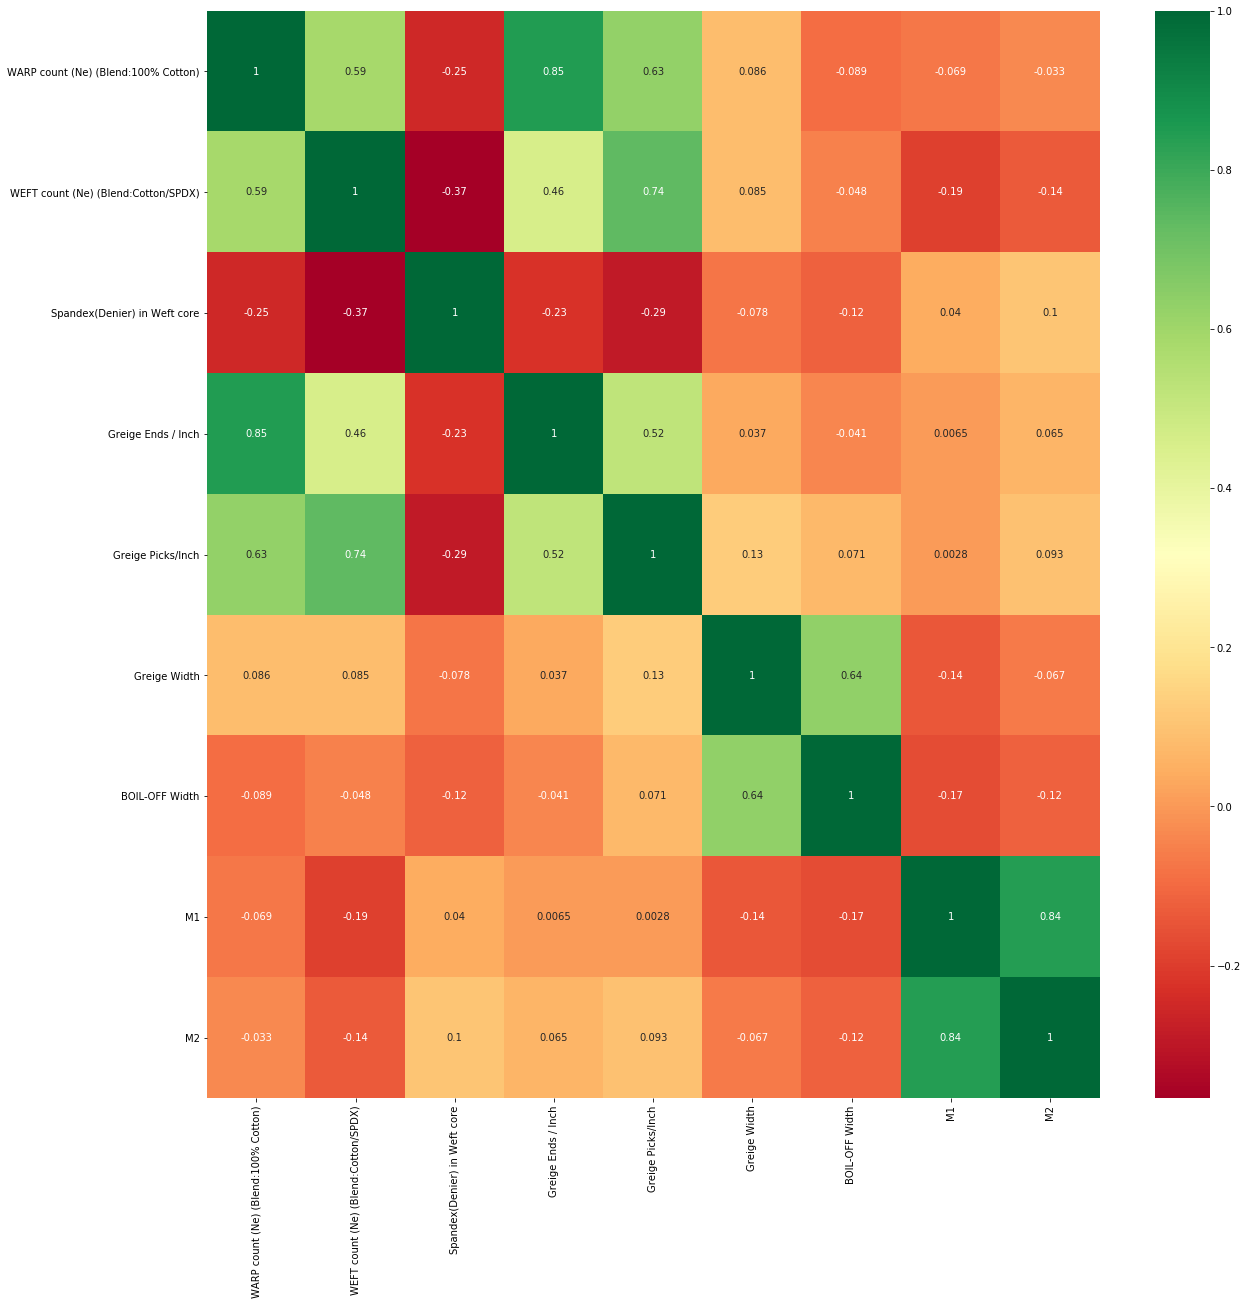

In [18]:
corrmat = final_dataset.corr()
corr_features = corrmat.index
plt.figure(figsize = (20, 20))
## heat graph of input features
graph = sns.heatmap(final_dataset[corr_features].corr(), annot= True, cmap = 'RdYlGn')

In [19]:
final_dataset.head()

,WARP count (Ne) (Blend:100% Cotton),WEFT count (Ne) (Blend:Cotton/SPDX),Spandex(Denier) in Weft core,Greige Ends / Inch,Greige Picks/Inch,Greige Width,BOIL-OFF Width,M1,M2
0,10,10,105,62,54,194.0,147.0,1.60,1.60
1,10,10,70,66,40,170.0,141.5,2.00,2.00
2,10,10,70,66,44,193.5,138.0,1.60,1.60
3,10,10,70,66,44,193.0,144.0,1.60,1.60
4,10,10,70,66,50,174.5,139.5,1.46,1.28


In [20]:
## choosing input and output features
X = final_dataset[['WARP count (Ne) (Blend:100% Cotton)','WEFT count (Ne) (Blend:Cotton/SPDX)', 'Spandex(Denier) in Weft core','Greige Ends / Inch', 'Greige Picks/Inch', 'Greige Width','M1', 'M2']]
y = final_dataset.iloc[:, 6]

In [21]:
X.head()

,WARP count (Ne) (Blend:100% Cotton),WEFT count (Ne) (Blend:Cotton/SPDX),Spandex(Denier) in Weft core,Greige Ends / Inch,Greige Picks/Inch,Greige Width,M1,M2
0,10,10,105,62,54,194.0,1.60,1.60
1,10,10,70,66,40,170.0,2.00,2.00
2,10,10,70,66,44,193.5,1.60,1.60
3,10,10,70,66,44,193.0,1.60,1.60
4,10,10,70,66,50,174.5,1.46,1.28


In [22]:
X.to_csv('X.csv', index = False)
y.to_csv('y.csv', index = False)

In [23]:
y.head()

0    147.0
1    141.5
2    138.0
3    144.0
4    139.5
Name: BOIL-OFF Width, dtype: float64

In [24]:
## feature ensamble 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y);

E:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


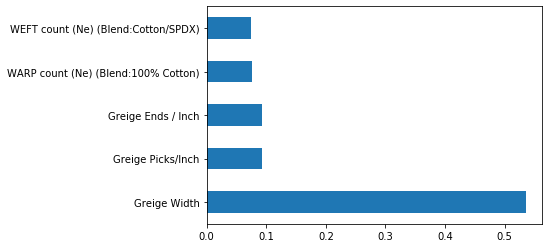

In [25]:
# for better visualization below is the graph
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')
plt.show()

LinregressResult(slope=-0.14029379464890238, intercept=132.83097872171302, rvalue=-0.08925627927011347, pvalue=0.001549980448121689, stderr=0.04422697914940152)


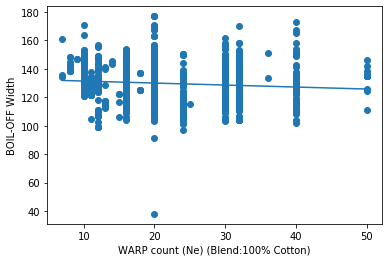

LinregressResult(slope=-0.11954909471100965, intercept=131.84355071225565, rvalue=-0.04819662798841073, pvalue=0.08787722862609337, stderr=0.06999211231769181)


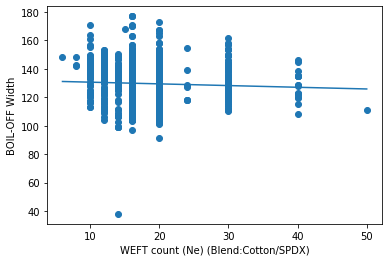

LinregressResult(slope=-0.07815998621545636, intercept=135.0698804228223, rvalue=-0.11966169261744798, pvalue=2.135911406770228e-05, stderr=0.018319853948799324)


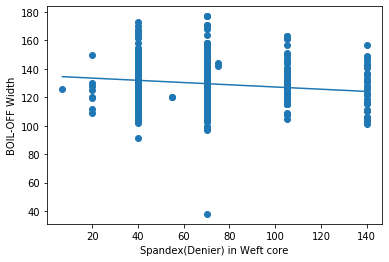

LinregressResult(slope=-0.021594492627555684, intercept=131.8824027927116, rvalue=-0.040615543010312935, pvalue=0.15043264204280354, stderr=0.015007788421129948)


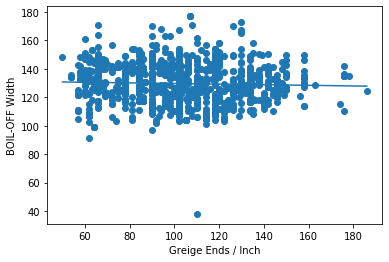

LinregressResult(slope=0.07534100359195209, intercept=124.80313158424188, rvalue=0.07112050658732366, pvalue=0.011728991988040805, stderr=0.029851068335536267)


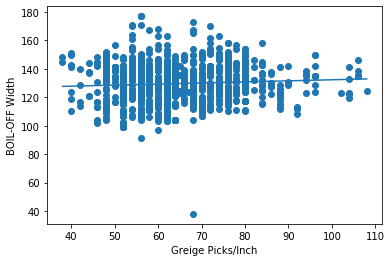

LinregressResult(slope=0.6496919258610592, intercept=12.548235125687768, rvalue=0.6350372284334228, pvalue=1.1840355229445464e-142, stderr=0.022326510654298932)


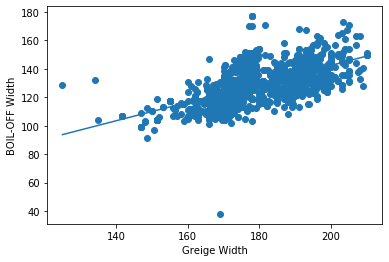

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=0.0, stderr=0.0)


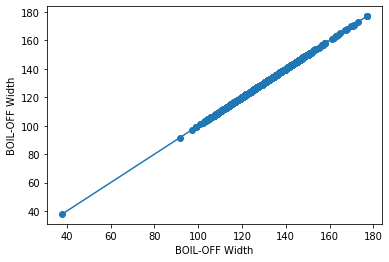

LinregressResult(slope=-9.137712972220852, intercept=145.09591482362188, rvalue=-0.1681718725149984, pvalue=2.041652848637238e-09, stderr=1.513138878181494)


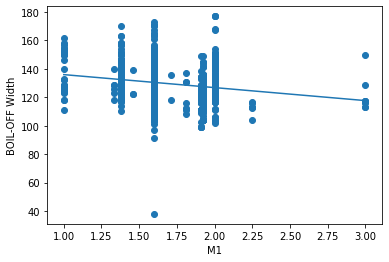

LinregressResult(slope=-6.946066216806323, intercept=141.07393577734214, rvalue=-0.11929371309132239, pvalue=2.2650221313573233e-05, stderr=1.6331775734383458)


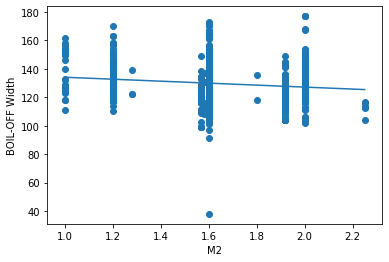

In [28]:
for feature in final_dataset:
    data = final_dataset.copy()
    ## capture the diffrence between YrSold and year of bulding
#     data[feature] = data['YrSold'] - data[feature]
    linout = stats.linregress(data[feature], data['BOIL-OFF Width'])
    x_fit = np.linspace(np.min(data[feature]), np.max(data[feature]))
    y_fit = x_fit*linout[0] + linout[1]
    print(linout)
    plt.scatter(data[feature], data['BOIL-OFF Width'])
    plt.xlabel(feature)
    plt.ylabel('BOIL-OFF Width')
    plt.plot(x_fit, y_fit)
    plt.show()

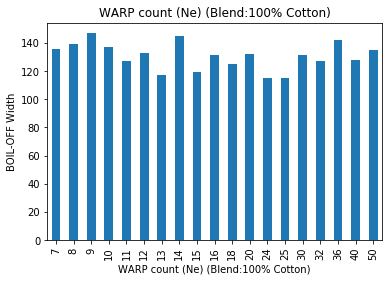

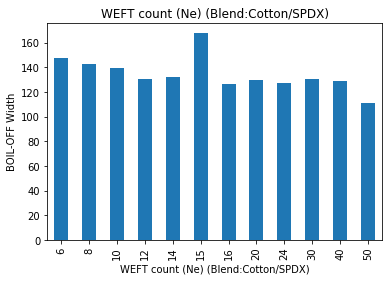

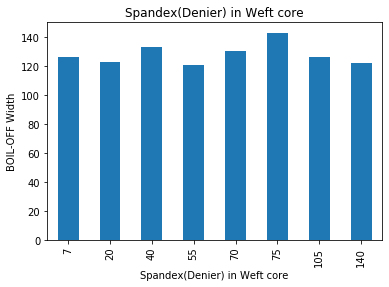

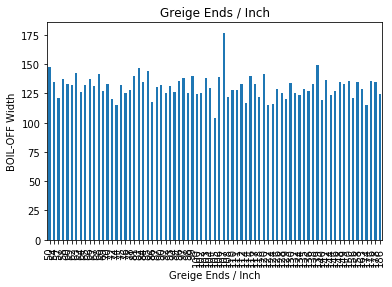

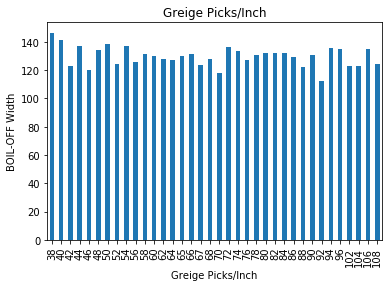

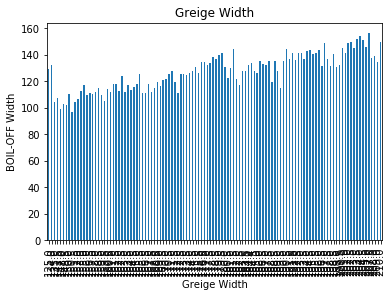

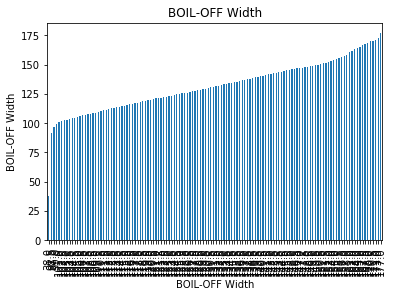

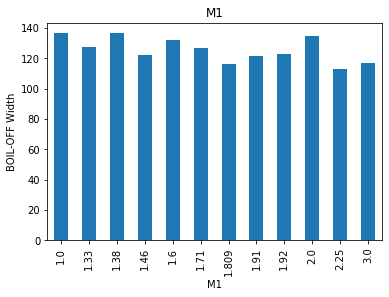

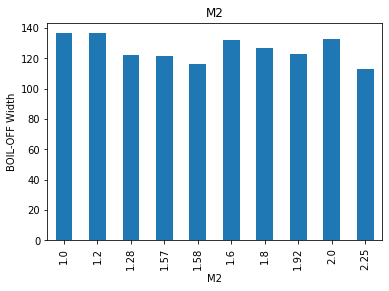

In [29]:
for feature in final_dataset:
    data = final_dataset.copy()
    data.groupby(feature)['BOIL-OFF Width'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("BOIL-OFF Width")
    plt.title(feature)
    plt.show()

In [27]:
import numpy as np
from scipy import stats

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [33]:
X_train.shape

(1004, 8)

In [34]:
X_test.shape

(251, 8)

In [35]:
y_train.shape

(1004,)

In [36]:
y_test.shape

(251,)

In [37]:
import keras

Using TensorFlow backend.
E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

In [38]:
model = keras.Sequential()
model.add(keras.layers.Dense(8, activation = 'relu', input_shape = (8,)))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(16, activation = 'relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 777
Trainable params: 777
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, epochs = 256, callbacks = [keras.callbacks.EarlyStopping(patience=5)])


Epoch 1/256
1004/1004 [==============================] - 4s 4ms/step - loss: 23469.6622
Epoch 2/256
 608/1004 [=================>............] - ETA: 0s - loss: 12070.9638

E:\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1004/1004 [==============================] - 0s 301us/step - loss: 9893.1068
Epoch 3/256
1004/1004 [==============================] - ETA: 0s - loss: 1432.95 - 0s 341us/step - loss: 1417.7621
Epoch 4/256
1004/1004 [==============================] - 0s 232us/step - loss: 149.7858
Epoch 5/256
1004/1004 [==============================] - 0s 233us/step - loss: 128.4568
Epoch 6/256
1004/1004 [==============================] - 0s 237us/step - loss: 123.5729
Epoch 7/256
1004/1004 [==============================] - 0s 270us/step - loss: 121.9287
Epoch 8/256
1004/1004 [==============================] - 0s 281us/step - loss: 119.6977
Epoch 9/256
1004/1004 [==============================] - 0s 228us/step - loss: 118.0424
Epoch 10/256
1004/1004 [==============================] - 0s 236us/step - loss: 116.6624
Epoch 11/256
1004/1004 [==============================] - 0s 232us/step - loss: 114.7046
Epoch 12/256
1004/1004 [==============================] - 0s 253us/step - loss: 112.7181
Epoch 13/256


1004/1004 [==============================] - 0s 239us/step - loss: 86.6276
Epoch 95/256
1004/1004 [==============================] - 0s 241us/step - loss: 86.7986
Epoch 96/256
1004/1004 [==============================] - 0s 256us/step - loss: 87.5217
Epoch 97/256
1004/1004 [==============================] - 0s 236us/step - loss: 85.0629
Epoch 98/256
1004/1004 [==============================] - 0s 248us/step - loss: 85.7514
Epoch 99/256
1004/1004 [==============================] - 0s 253us/step - loss: 85.7510
Epoch 100/256
1004/1004 [==============================] - 0s 243us/step - loss: 85.8103
Epoch 101/256
1004/1004 [==============================] - 0s 237us/step - loss: 85.7365
Epoch 102/256
1004/1004 [==============================] - 0s 247us/step - loss: 85.9957
Epoch 103/256
1004/1004 [==============================] - 0s 319us/step - loss: 86.0064
Epoch 104/256
1004/1004 [==============================] - 0s 242us/step - loss: 85.3811
Epoch 105/256
1004/1004 [===============

1004/1004 [==============================] - 0s 316us/step - loss: 83.9250
Epoch 187/256
1004/1004 [==============================] - 0s 315us/step - loss: 81.4984
Epoch 188/256
1004/1004 [==============================] - 0s 327us/step - loss: 81.5897
Epoch 189/256
1004/1004 [==============================] - 0s 315us/step - loss: 82.0480
Epoch 190/256
1004/1004 [==============================] - 0s 305us/step - loss: 79.8990
Epoch 191/256
1004/1004 [==============================] - 0s 316us/step - loss: 79.6255
Epoch 192/256
1004/1004 [==============================] - 0s 318us/step - loss: 78.8473
Epoch 193/256
1004/1004 [==============================] - 0s 313us/step - loss: 79.7267
Epoch 194/256
1004/1004 [==============================] - 0s 307us/step - loss: 79.8748
Epoch 195/256
1004/1004 [==============================] - 0s 304us/step - loss: 81.2518
Epoch 196/256
1004/1004 [==============================] - 0s 296us/step - loss: 82.2631
Epoch 197/256
1004/1004 [==========

In [41]:
predictions = model.predict(X_test)

In [42]:
predictions

array([[122.439384],
       [140.83998 ],
       [135.07547 ],
       [126.15346 ],
       [141.80011 ],
       [119.642075],
       [131.27156 ],
       [103.37747 ],
       [140.65265 ],
       [119.80126 ],
       [120.49692 ],
       [121.2328  ],
       [113.03726 ],
       [137.80644 ],
       [136.32251 ],
       [144.0268  ],
       [140.16203 ],
       [134.3125  ],
       [113.88005 ],
       [124.61392 ],
       [128.42116 ],
       [141.22908 ],
       [141.0931  ],
       [110.599625],
       [129.7043  ],
       [134.31204 ],
       [115.8869  ],
       [112.75133 ],
       [149.80185 ],
       [141.54515 ],
       [126.91826 ],
       [133.53738 ],
       [127.73381 ],
       [128.5711  ],
       [135.07547 ],
       [124.868904],
       [119.165115],
       [116.91984 ],
       [143.25966 ],
       [115.58198 ],
       [131.97623 ],
       [139.74123 ],
       [133.7839  ],
       [141.21083 ],
       [134.9387  ],
       [116.214874],
       [145.83415 ],
       [105.5

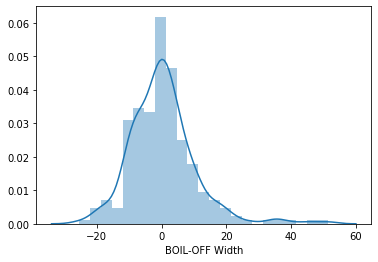

In [43]:
result = predictions.flatten()
sns.distplot(y_test-result)

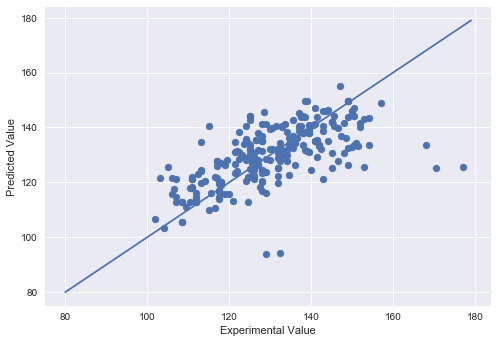

In [50]:
plt.style.use('seaborn')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
x = np.arange(80, 180)
y = x
plt.plot(x, y)
plt.scatter(y_test,result)

In [45]:
from sklearn import metrics
import numpy as np

In [48]:
# average deviation ofprediction from actual value
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, result))

# deviation from mean value
print('Mean Standard Error:', metrics.mean_squared_error(y_test, result))

# measure of how far the points from expected line are
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, result)))

Mean Absolute Error: 7.247467600301918
Mean Standard Error: 106.12370532164529
Root mean squared error: 10.301636050727344


In [47]:
import pickle
# open a file, where you ant to store the data
file = open('shrik_ann_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)